
# Project Vehicle Crash - Modeling Approach Part II

*Note: This code is for modeling on Vehicle Crash data of year 2007-2017 from Pennsylvania Department of Transportation (Penn DOT). See more details here - https://www.opendataphilly.org/dataset/vehicular-crash-data*

* _Author: Daniel Hu (<font color='blue'>daniel.hu2001@gmail.com</font>)_
* _Testing Environment: Python 3.7 on Mac OS_
* _Date: 08/04/2019_

>__Table of Contents__
- [Read data](#Read-data)
- [crash type: non-collision](#non-collision)
- [crash type: hit pedestrian](#pedestrian)
- [crash type: hit fixed object](#fixed-object)

# Step 1. Import packages and setup

In [1]:
# python packages
import pandas as pd
import numpy as np
import math
import time
import subprocess as sbp
import os
import sklearn

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
#import gmplot

# modeling
from sklearn import tree
from sklearn.model_selection import train_test_split

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# dos command to check pyhon version
!python --version

Python 3.7.0


In [3]:
# package versions

print("pandas version: {0}".format(pd.__version__))
print("numpy version: {0}".format(np.__version__))

pandas version: 0.24.2
numpy version: 1.15.0


 <a id='Read-data'> </a>
 # Step 2. Read Data

## 2.1 Load prepared data

In [4]:
df_tmp = pd.read_csv(r'C:\Users\weiko\Desktop\homework\vehicle\df_master_07_17_crn_lvl.csv')

In [51]:
pd.options.display.max_rows = 500

df_tmp.head(2).transpose()

,0,1
Unnamed: 0,0,1
ARRIVAL_TM,1815,300
AUTOMOBILE_COUNT,3,3
BELTED_DEATH_COUNT,0,0
BELTED_MAJ_INJ_COUNT,0,0
BICYCLE_COUNT,0,0
BICYCLE_DEATH_COUNT,0,0
BICYCLE_MAJ_INJ_COUNT,0,0
BUS_COUNT,0,0
COLLISION_TYPE,2,5


In [5]:
lst_vars_drop = ['Unnamed: 0','ARRIVAL_TM','DISPATCH_TM','DISTRICT','EST_HRS_CLOSED','LANE_CLOSED','LATITUDE','LN_CLOSE_DIR',
                 'LONGITUDE','MAX_SEVERITY_LEVEL','MIN_INJ_COUNT','MOD_INJ_COUNT','NTFY_HIWY_MAINT','POLICE_AGCY',
                 'RDWY_SURF_TYPE_CD','SPEC_JURIS_CD','TCD_FUNC_CD','TCD_TYPE','TFC_DETOUR_IND','UNK_INJ_DEG_COUNT',
                 'UNK_INJ_PER_COUNT','WORKERS_PRES','WORK_ZONE_LOC','WORK_ZONE_TYPE','WZ_CLOSE_DETOUR','WZ_FLAGGER',
                 'WZ_LAW_OFFCR_IND','WZ_LN_CLOSURE','WZ_MOVING','WZ_OTHER','WZ_SHLDER_MDN']

In [6]:
df_tmp.drop(lst_vars_drop, axis=1, inplace=True)

## 2.2 Pre-process data

In [55]:
df_tmp.isnull().sum()

AUTOMOBILE_COUNT                             0
BELTED_DEATH_COUNT                           0
BELTED_MAJ_INJ_COUNT                         0
BICYCLE_COUNT                                0
BICYCLE_DEATH_COUNT                          0
BICYCLE_MAJ_INJ_COUNT                        0
BUS_COUNT                                    0
COLLISION_TYPE                               0
COMM_VEH_COUNT                               0
CONS_ZONE_SPD_LIM                       110648
CRASH_MONTH                                  0
CRN                                          0
DAY_OF_WEEK                                  0
DEC_LAT                                   1294
DEC_LONG                                  1294
DRIVER_COUNT_16YR                            0
DRIVER_COUNT_17YR                            0
DRIVER_COUNT_18YR                            0
DRIVER_COUNT_19YR                            0
DRIVER_COUNT_20YR                            0
DRIVER_COUNT_50_64YR                         0
DRIVER_COUNT_

### 2.2.1 Crash data

In [97]:
df_tmp.groupby(['HOUR_OF_DAY','derived_ind_hour_00_04'])['CRN'].count()

HOUR_OF_DAY  derived_ind_hour_00_04
0.0          1                         3539
1.0          1                         3163
2.0          1                         3806
3.0          1                         2502
4.0          0                         1777
5.0          0                         1918
6.0          0                         3217
7.0          0                         4868
8.0          0                         6149
9.0          0                         4908
10.0         0                         4825
11.0         0                         5145
12.0         0                         5922
13.0         0                         5960
14.0         0                         6405
15.0         0                         7788
16.0         0                         7928
17.0         0                         7491
18.0         0                         6826
19.0         0                         5541
20.0         0                         4757
21.0         0                         4

In [96]:
df_tmp.groupby(['DAY_OF_WEEK','derived_ind_fri_sat'])['CRN'].count()

DAY_OF_WEEK  derived_ind_fri_sat
1            0                      16650
2            0                      16447
3            0                      17073
4            0                      17020
5            0                      17325
6            1                      19694
7            1                      18907
Name: CRN, dtype: int64

In [7]:
# crash data
df_tmp.fillna({'HOUR_OF_DAY':99},inplace=True)
df_tmp['derived_ind_hour_00_04'] = df_tmp['HOUR_OF_DAY'].apply(lambda x: 1 if (x >= 0)&(x < 4) else 0)
df_tmp['derived_ind_hour_04_08'] = df_tmp['HOUR_OF_DAY'].apply(lambda x: 1 if (x >= 4)&(x < 8) else 0)
df_tmp['derived_ind_hour_08_12'] = df_tmp['HOUR_OF_DAY'].apply(lambda x: 1 if (x >= 8)&(x < 12) else 0)
df_tmp['derived_ind_hour_12_16'] = df_tmp['HOUR_OF_DAY'].apply(lambda x: 1 if (x >= 12)&(x < 16) else 0)
df_tmp['derived_ind_hour_16_20'] = df_tmp['HOUR_OF_DAY'].apply(lambda x: 1 if (x >= 16)&(x < 20) else 0)
df_tmp['derived_ind_hour_20_24'] = df_tmp['HOUR_OF_DAY'].apply(lambda x: 1 if (x >= 20)&(x <= 23) else 0)
                                                             
df_tmp['derived_ind_weekday'] = df_tmp['DAY_OF_WEEK'].apply(lambda x: 1 if (x >= 2)&(x <= 6) else 0)
df_tmp['derived_ind_weekend'] = df_tmp['DAY_OF_WEEK'].apply(lambda x: 1 if (x == 1)|(x == 7) else 0)
df_tmp['derived_ind_fri_sat'] = df_tmp['DAY_OF_WEEK'].apply(lambda x: 1 if (x == 6)|(x == 7) else 0)

df_tmp['derived_ind_summer_6_8'] = df_tmp['CRASH_MONTH'].apply(lambda x: 1 if (x >= 6)&(x <= 8) else 0)
df_tmp['derived_ind_winter_11_2'] = df_tmp['CRASH_MONTH'].apply(lambda x: 1 if (x <= 2)|(x >= 11) else 0)

### 2.2.2 Flag data

In [8]:
dict_var_flag ={
'AGGRESSIVE_DRIVING':0
,'ALCOHOL_RELATED':0
,'BICYCLE':0
,'CELL_PHONE':0
,'COMM_VEHICLE':0
,'CRASH_YEAR':0
,'CROSS_MEDIAN':0
,'CURVED_ROAD':0
,'CURVE_DVR_ERROR':0
,'DEER_RELATED':0
,'DISTRACTED':0
,'DRINKING_DRIVER':0
,'DRIVER_16YR':0
,'DRIVER_17YR':0
,'DRIVER_18YR':0
,'DRIVER_19YR':0
,'DRIVER_20YR':0
,'DRIVER_50_64YR':0
,'DRIVER_65_74YR':0
,'DRIVER_75PLUS':0
,'DRUGGED_DRIVER':0
,'DRUG_RELATED':0
,'FATAL':0
,'FATAL_OR_MAJ_INJ':0
,'FATIGUE_ASLEEP':0
,'FIRE_IN_VEHICLE':0
,'HAZARDOUS_TRUCK':0
,'HIT_BARRIER':0
,'HIT_BRIDGE':0
,'HIT_DEER':0
,'HIT_EMBANKMENT':0
,'HIT_FIXED_OBJECT':0
,'HIT_GDRAIL':0
,'HIT_GDRAIL_END':0
,'HIT_PARKED_VEHICLE':0
,'HIT_POLE':0
,'HIT_TREE_SHRUB':0
,'HO_OPPDIR_SDSWP':0
,'HVY_TRUCK_RELATED':0
,'ICY_ROAD':0
,'ILLEGAL_DRUG_RELATED':0
,'ILLUMINATION_DARK':0
,'IMPAIRED_DRIVER':0
,'INJURY':0
,'INJURY_OR_FATAL':0
,'INTERSECTION':0
,'INTERSTATE':0
,'LIMIT_65MPH':0
,'LOCAL_ROAD':0
,'LOCAL_ROAD_ONLY':0
,'MAJOR_INJURY':0
,'MC_DRINKING_DRIVER':0
,'MINOR_INJURY':0
,'MODERATE_INJURY':0
,'MOTORCYCLE':0
,'NHTSA_AGG_DRIVING':0
,'NON_INTERSECTION':0
,'NO_CLEARANCE':0
,'OVERTURNED':0
,'PEDESTRIAN':0
,'PHANTOM_VEHICLE':0
,'PROPERTY_DAMAGE_ONLY':0
,'PSP_REPORTED':0
,'REAR_END':0
,'RUNNING_RED_LT':0
,'RUNNING_STOP_SIGN':0
,'SCHOOL_BUS':0
,'SCHOOL_BUS_UNIT':0
,'SCHOOL_ZONE':0
,'SHLDR_RELATED':0
,'SIGNALIZED_INT':0
,'SNOW_SLUSH_ROAD':0
,'SPEEDING':0
,'SPEEDING_RELATED':0
,'STATE_ROAD':0
,'STOP_CONTROLLED_INT':0
,'SUDDEN_DEER':0
,'SV_RUN_OFF_RD':0
,'TAILGATING':0
,'TRAIN':0
,'TRAIN_TROLLEY':0
,'TROLLEY':0
,'TURNPIKE':0
,'UNBELTED':0
,'UNDERAGE_DRNK_DRV':0
,'UNLICENSED':0
,'UNSIGNALIZED_INT':0
,'VEHICLE_FAILURE':0
,'VEHICLE_TOWED':0
,'WET_ROAD':0
,'WORK_ZONE':0}

In [9]:
df_tmp.fillna(dict_var_flag,inplace=True)

### 2.2.3 Roadway data

In [13]:
df_tmp.groupby('SPEED_LIMIT_max')['CRN'].count()

SPEED_LIMIT_max
10.0       62
15.0      970
20.0      482
25.0    42538
30.0    15015
35.0    22419
40.0     5574
45.0     3657
50.0     6865
55.0    10928
60.0        3
65.0       23
75.0        1
Name: CRN, dtype: int64

In [10]:
dict_var_roadway ={
'cnt_road_01_interstate':0
,'cnt_road_02_state':0
,'cnt_road_03_local':0
,'cnt_road_04_other':0
,'cnt_road_segments':0
,'LANE_COUNT_min':99
,'LANE_COUNT_max':99
,'SPEED_LIMIT_nunique':0
,'SPEED_LIMIT_min':999
,'SPEED_LIMIT_max':999}

In [11]:
df_tmp.fillna(dict_var_roadway,inplace=True)

### 2.2.4 Vehicle data

In [101]:
df_tmp.groupby('model_yr_min')['CRN'].count()

model_yr_min
40.0         1
999.0        1
1900.0       3
1902.0       1
1903.0       1
1904.0       2
1908.0       2
1912.0       1
1920.0       3
1930.0       1
1944.0       1
1945.0       2
1947.0       3
1950.0       1
1954.0       1
1956.0       1
1958.0       1
1959.0       1
1963.0       2
1964.0       4
1965.0       3
1966.0       2
1967.0       3
1968.0       8
1969.0       4
1970.0       5
1971.0       6
1972.0       6
1973.0       9
1974.0      10
1975.0       8
1976.0      15
1977.0      21
1978.0      29
1979.0      35
1980.0      30
1981.0      44
1982.0      56
1983.0      80
1984.0     130
1985.0     198
1986.0     268
1987.0     407
1988.0     566
1989.0     730
1990.0    1099
1991.0    1374
1992.0    1993
1993.0    2645
1994.0    3483
1995.0    4503
1996.0    4899
1997.0    6214
1998.0    6773
1999.0    7293
2000.0    8957
2001.0    7841
2002.0    7877
2003.0    7543
2004.0    7199
2005.0    6497
2006.0    6048
2007.0    5265
2008.0    4170
2009.0    2632
2010.0    23

In [12]:
dict_var_vehicle ={'model_yr_min':9999,'speed_max':999}

In [13]:
df_tmp.fillna(dict_var_vehicle,inplace=True)

In [14]:
df_tmp['model_yr_min'].isnull().sum()

0

In [15]:
df_tmp['tmp_vehicle_model_age_min'] = df_tmp['CRASH_YEAR'] - df_tmp['model_yr_min']
df_tmp['derived_vehicle_model_age_min'] = df_tmp['tmp_vehicle_model_age_min'].apply(lambda x: x if x>0 else 0)

### 2.2.5 Person data

In [66]:
df_tmp.groupby('drv_drinking_sum')['CRN'].count()

drv_drinking_sum
0.0    116673
1.0      5658
2.0        60
3.0         1
4.0         2
Name: CRN, dtype: int64

In [16]:
dict_var_person ={
    'cnt_driver':0,'drv_age_min':99,'drv_age_max':99,'drv_drinking_sum':0,'drv_drug_sum':0,
    'drv_sick_medication_sum':0,'drv_fatigue_asleep_sum':0,'drv_no_restraint_helmet_sum':0,
    'cnt_passenger':0,'passenger_age_min':99,'passenger_age_max':99,'passenger_no_restraint_helmet_sum':0,
    'cnt_pedestrian':0,'pedestrian_age_min':99,'pedestrian_age_max':99,'pedestrian_drinking_sum':0,
    'pedestrian_drug_sum':0,'pedestrian_sick_medication_sum':0,'pedestrian_fatigue_asleep_sum':0,
    'pedestrian_loc_int_crosswalk_sum':0,'pedestrian_loc_int_no_crosswalk_sum':0,
    'pedestrian_loc_in_roadway_sum':0,'pedestrian_loc_shoulder_sidewalk_sum':0,
    'pedestrian_signal_Y_sum':0,'pedestrian_signal_N_sum':0,'pedestrian_signal_not_int_sum':0}

In [17]:
df_tmp.fillna(dict_var_person,inplace=True)

In [18]:
df_tmp.isnull().sum()

AUTOMOBILE_COUNT                             0
BELTED_DEATH_COUNT                           0
BELTED_MAJ_INJ_COUNT                         0
BICYCLE_COUNT                                0
BICYCLE_DEATH_COUNT                          0
BICYCLE_MAJ_INJ_COUNT                        0
BUS_COUNT                                    0
COLLISION_TYPE                               0
COMM_VEH_COUNT                               0
CONS_ZONE_SPD_LIM                       110648
CRASH_MONTH                                  0
CRN                                          0
DAY_OF_WEEK                                  0
DEC_LAT                                   1294
DEC_LONG                                  1294
DRIVER_COUNT_16YR                            0
DRIVER_COUNT_17YR                            0
DRIVER_COUNT_18YR                            0
DRIVER_COUNT_19YR                            0
DRIVER_COUNT_20YR                            0
DRIVER_COUNT_50_64YR                         0
DRIVER_COUNT_

In [19]:
df_tmp['MAJ_INJ_COUNT'].isnull().sum()

0

In [20]:
df_tmp.groupby('MAJ_INJ_COUNT')['CRN'].count()

MAJ_INJ_COUNT
0    120262
1      2613
2       192
3        38
4         6
5         5
Name: CRN, dtype: int64

In [21]:
# dependent variables
df_tmp['ind_fatal'] = df_tmp['FATAL_COUNT'].apply(lambda x: 1 if x > 0 else 0)
df_tmp['ind_maj_inj'] = df_tmp['MAJ_INJ_COUNT'].apply(lambda x: 1 if x > 0 else 0)
df_tmp['ind_fatal_maj_inj'] = np.where((df_tmp['FATAL_COUNT']>0)|(df_tmp['MAJ_INJ_COUNT']>0),1,0)

In [22]:
df_tmp.isnull().sum()

AUTOMOBILE_COUNT                             0
BELTED_DEATH_COUNT                           0
BELTED_MAJ_INJ_COUNT                         0
BICYCLE_COUNT                                0
BICYCLE_DEATH_COUNT                          0
BICYCLE_MAJ_INJ_COUNT                        0
BUS_COUNT                                    0
COLLISION_TYPE                               0
COMM_VEH_COUNT                               0
CONS_ZONE_SPD_LIM                       110648
CRASH_MONTH                                  0
CRN                                          0
DAY_OF_WEEK                                  0
DEC_LAT                                   1294
DEC_LONG                                  1294
DRIVER_COUNT_16YR                            0
DRIVER_COUNT_17YR                            0
DRIVER_COUNT_18YR                            0
DRIVER_COUNT_19YR                            0
DRIVER_COUNT_20YR                            0
DRIVER_COUNT_50_64YR                         0
DRIVER_COUNT_

In [23]:
df_tmp.dtypes

AUTOMOBILE_COUNT                          int64
BELTED_DEATH_COUNT                        int64
BELTED_MAJ_INJ_COUNT                      int64
BICYCLE_COUNT                             int64
BICYCLE_DEATH_COUNT                       int64
BICYCLE_MAJ_INJ_COUNT                     int64
BUS_COUNT                                 int64
COLLISION_TYPE                            int64
COMM_VEH_COUNT                            int64
CONS_ZONE_SPD_LIM                        object
CRASH_MONTH                               int64
CRN                                       int64
DAY_OF_WEEK                               int64
DEC_LAT                                 float64
DEC_LONG                                float64
DRIVER_COUNT_16YR                         int64
DRIVER_COUNT_17YR                         int64
DRIVER_COUNT_18YR                         int64
DRIVER_COUNT_19YR                         int64
DRIVER_COUNT_20YR                         int64
DRIVER_COUNT_50_64YR                    

In [24]:
df_tmp.head(2).to_csv('test.csv')

In [25]:
df_tmp['CRN'].count()

123116

In [157]:
df_tmp.head(1000).to_csv('df_master1_07_17_crn_lvl_top_1k.csv',index=False)

## 2.3 Split data by crash types

In [26]:
df_tmp.groupby(['COLLISION_TYPE','collision_type_name'])['CRN'].count()

COLLISION_TYPE  collision_type_name     
0               Non collision                1365
1               Rear-end                    28997
2               Head-on                      3871
3               Backing                       503
4               Angle                       39892
5               Sideswipe(same dir.)        11335
6               Sideswipe(Opposite dir.)     3244
7               Hit fixed object            15162
8               Hit pedestrian              18473
9               Other or Unknow               274
Name: CRN, dtype: int64

In [27]:
# hit pedestrian (also includes some bicycle crashes?)
df_hit_ped = df_tmp[df_tmp['collision_type_name'] == 'Hit pedestrian']

# non collision + hit fixed object
df_nc_hit_fixed_obj = df_tmp[df_tmp['COLLISION_TYPE'].isin([0,7])]

# others
df_crash_others = df_tmp[df_tmp['COLLISION_TYPE'].isin([1,2,3,4,5,6,9])]

In [28]:
df_hit_ped.head(2).transpose()

,15,17
AUTOMOBILE_COUNT,0,2
BELTED_DEATH_COUNT,0,0
BELTED_MAJ_INJ_COUNT,0,0
BICYCLE_COUNT,0,0
BICYCLE_DEATH_COUNT,0,0
BICYCLE_MAJ_INJ_COUNT,0,0
BUS_COUNT,0,0
COLLISION_TYPE,8,8
COMM_VEH_COUNT,0,0
CONS_ZONE_SPD_LIM,NaN,NaN


In [29]:
#pd.crosstab(df_tmp['collision_type_name'], df_tmp['PED_COUNT'])
pd.crosstab(df_nc_hit_fixed_obj['collision_type_name'], df_nc_hit_fixed_obj['HIT_POLE'])

#collision_type_name
#PEDESTRIAN
#pedestrian_cnt
#cnt_pedestrian

#PED_COUNT
#PED_DEATH_COUNT
#PED_MAJ_INJ_COUNT

#BICYCLE_COUNT
#BICYCLE_DEATH_COUNT
#BICYCLE_MAJ_INJ_COUNT

#MOTORCYCLE_COUNT
#MCYCLE_DEATH_COUNT
#MCYCLE_MAJ_INJ_DEATH_COUNT

#AUTOMOBILE_COUNT

#VEHICLE_COUNT

#SV_RUN_OFF_RD
#HIT_FIXED_OBJECT
#HO_OPPDIR_SDSWP

#HIT_BARRIER
#HIT_BRIDGE
#HIT_DEER
#HIT_EMBANKMENT

#HIT_GDRAIL
#HIT_GDRAIL_END
#HIT_PARKED_VEHICLE
#HIT_POLE
#HIT_TREE_SHRUB



HIT_POLE,0.0,1.0
collision_type_name,,
Hit fixed object,12408,2754
Non collision,1349,16


# Step 3. Decision Tree model

In [30]:
# default weight for non-target records
weight_good = 1

# helper function to calcualte ks and gini
def ks_gini(in_array, n_grp, out_csv):
    # sort by 1st column asending order then flip
    array_srt = np.flip(in_array[in_array[:,0].argsort()],0)
    pd_df = pd.DataFrame(array_srt, columns=['pred', 'actual'])
    pd_df['wt'] = weight_good - pd_df['actual']*(weight_good - 1)
    tot_y1 = pd_df.loc[pd_df['actual'] == 1, 'wt'].sum()
    tot_y0 = pd_df.loc[pd_df['actual'] == 0, 'wt'].sum()
    tot = pd_df['wt'].sum()
    #print(tot_y1)
    #print(tot_y0)
    #print(tot)
    pd_df['cumtot'] = pd_df['wt'].cumsum()
    pd_df['grp_id'] = 1 + (n_grp * (pd_df['cumtot'] - 1)) // tot
    pd_df['y0'] = (pd_df['actual'] == 0) * pd_df['wt']
    pd_df['y1'] = (pd_df['actual'] == 1) * pd_df['wt']
    pd_df['pwt'] = pd_df['pred']*pd_df['wt']
    
    temp = pd_df.groupby(['grp_id'])['y0','y1','wt','pwt'].sum()
    temp = temp.rename(columns={'wt': 'sumwt', 'pwt': 'sump'})
    temp['tot'] = temp['y0'] + temp['y1']
    temp['y0cum'] = temp['y0'].cumsum()
    temp['y1cum'] = temp['y1'].cumsum()
    temp['cumtot'] = temp['y0cum'] + temp['y1cum']
    
    temp['p_y1cum'] = temp['y1cum'] / tot_y1
    temp['p_y0cum'] = temp['y0cum'] / tot_y0
    
    temp['ks'] = abs(temp['y1cum'] / tot_y1 - temp['y0cum'] / tot_y0)
    temp.to_csv('{0}.csv'.format(out_csv))
    
    ks = temp['ks'].max()
    gini = ((2*temp['p_y1cum'].sum()-1)/(2*n_grp)-0.5)*2
    
    return ks, gini

## 3.1 Hit pedestrian

In [31]:
df_hit_ped.head(2).transpose()

,15,17
AUTOMOBILE_COUNT,0,2
BELTED_DEATH_COUNT,0,0
BELTED_MAJ_INJ_COUNT,0,0
BICYCLE_COUNT,0,0
BICYCLE_DEATH_COUNT,0,0
BICYCLE_MAJ_INJ_COUNT,0,0
BUS_COUNT,0,0
COLLISION_TYPE,8,8
COMM_VEH_COUNT,0,0
CONS_ZONE_SPD_LIM,NaN,NaN


In [92]:
# majority of fatalities are pedestrians

pd.crosstab(df_hit_ped['ind_fatal'],df_hit_ped['PED_DEATH_COUNT'])

PED_DEATH_COUNT,0,1,2,4
ind_fatal,,,,
0,18135,0,0,0
1,3,329,4,2


In [117]:
df_hit_ped.groupby(['ALCOHOL_RELATED','pedestrian_drinking_sum','drv_drinking_sum','PED_DEATH_COUNT'])['CRN'].count()

ALCOHOL_RELATED  pedestrian_drinking_sum  drv_drinking_sum  PED_DEATH_COUNT
0.0              0.0                      0.0               0                  17411
                                                            1                    235
                                                            2                      2
                                                            4                      2
                                          1.0               0                     22
                 1.0                      0.0               0                     54
                                          1.0               1                      1
1.0              0.0                      0.0               0                     96
                                                            1                     62
                                                            2                      1
                                          1.0               0             

In [81]:
df_hit_ped[df_hit_ped['PED_DEATH_COUNT'] > 0].groupby('pedestrian_drinking_sum')['CRN'].count()

pedestrian_drinking_sum
0.0    322
1.0     13
Name: CRN, dtype: int64

In [32]:
features_all = []

f = open("list_vars_all.txt", "r")
for x in f:
    features_all.append(x.strip('\n'))

In [33]:
len(features_all)

161

In [34]:
features_v1 = []

f = open("list_vars_v1.txt", "r")
for x in f:
    features_v1.append(x.strip('\n'))

In [35]:
len(features_v1)

135

In [120]:
pd.options.display.max_rows = 500

df_hit_ped[features_all].isnull().sum()

TOTAL_UNITS                             0
VEHICLE_COUNT                           0
AUTOMOBILE_COUNT                        0
PERSON_COUNT                            0
MOTORCYCLE_COUNT                        0
BICYCLE_COUNT                           0
PED_COUNT                               0
HEAVY_TRUCK_COUNT                       0
SMALL_TRUCK_COUNT                       0
COMM_VEH_COUNT                          0
BUS_COUNT                               0
VAN_COUNT                               0
SUV_COUNT                               0
UNBELTED_OCC_COUNT                      0
HAZARDOUS_TRUCK                         0
HVY_TRUCK_RELATED                       0
COMM_VEHICLE                            0
MOTORCYCLE                              0
BICYCLE                                 0
TRAIN                                   0
TRAIN_TROLLEY                           0
TROLLEY                                 0
VEHICLE_FAILURE                         0
PEDESTRIAN                        

In [73]:
# try ind_fatal first
#X = df_hit_ped[features_all]
X = df_hit_ped[features_v1]
#y = df_hit_ped['ind_fatal']
y = df_hit_ped['ind_fatal_maj_inj']

X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, random_state=2018)

In [74]:
#df_hit_ped[features+['ind_fatal']].to_csv('df_hit_ped.csv')

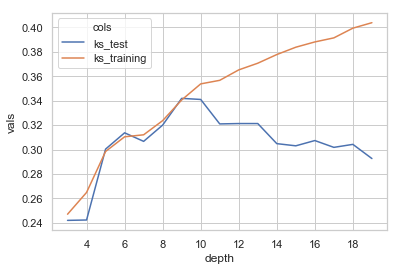

In [75]:
lst_depth = []
lst_dtc = []

lst_tst_ks = []
lst_trn_ks = []

lst_tst_gini = []
lst_trn_gini = []

for ii in range(3,20):
    lst_depth.append(ii)
    dtc = tree.DecisionTreeClassifier(max_depth = ii
                                      ,min_samples_leaf = 100
                                      ,min_samples_split = 200
                                      ,random_state = 2019)
    lst_dtc.append(dtc)
    dtc.fit(X_trn, y_trn)
    
    y_pred_prob_tst = dtc.predict_proba(X_tst)
    np_tst = np.stack((y_pred_prob_tst[:,1], y_tst.to_numpy()), axis=1)
    ks_tst_ii, gini_tst_ii = ks_gini(np_tst, 100, 'test')
    lst_tst_ks.append(ks_tst_ii)
    lst_tst_gini.append(gini_tst_ii)
    #print('test ks/gini: {0:2.2%}/{1:.4f}'.format(ks_tst,gini_tst))
    
    y_pred_prob_trn = dtc.predict_proba(X_trn)
    np_trn = np.stack((y_pred_prob_trn[:,1], y_trn.to_numpy()), axis=1)
    ks_trn_ii, gini_trn_ii = ks_gini(np_trn, 100, 'test')
    #print('training ks/gini: {0:2.2%}/{1:.4f}'.format(ks_trn,gini_trn))
    lst_trn_ks.append(ks_trn_ii)
    lst_trn_gini.append(gini_trn_ii)

    
df_ks = pd.DataFrame(list(zip(lst_depth, lst_tst_ks, lst_trn_ks)),
                     columns=['depth','ks_test', 'ks_training'])

df_ks1 = df_ks.melt('depth', var_name='cols',  value_name='vals')
sns.lineplot(x="depth", y="vals", hue='cols', data=df_ks1)

In [77]:
df_ks['diff_trn_tst'] = df_ks['ks_training'] - df_ks['ks_test']
df_ks

,depth,ks_test,ks_training,diff_trn_tst
0,3,0.242072,0.247099,0.005027
1,4,0.242371,0.264921,0.022550
2,5,0.300378,0.298435,-0.001942
3,6,0.313690,0.310440,-0.003250
4,7,0.306701,0.312075,0.005374
5,8,0.320014,0.323663,0.003650
6,9,0.341878,0.340575,-0.001304
7,10,0.340981,0.353721,0.012740
8,11,0.320978,0.356630,0.035652
9,12,0.321277,0.365178,0.043901


In [78]:
lst_dtc[2]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2019,
            splitter='best')

In [79]:
dot_data = tree.export_graphviz(lst_dtc[2], out_file='ped_tree.dot', feature_names=X.columns, class_names=['Not Fatal','Fatal'],
                                filled=True, rounded=True, proportion=True, special_characters=True)

In [80]:
!dot -Tpng ped_tree.dot -o ped_tree.png

In [62]:
#import graphviz

#graph = graphviz.Source(dot_data)
#graph

In [81]:
dot_data = tree.export_graphviz(lst_dtc[2], out_file='ped_tree1.dot', feature_names=X.columns, class_names=['Not Fatal','Fatal'],
                                filled=True, rounded=True, proportion=False, special_characters=True)

In [82]:
!dot -Tpng ped_tree1.dot -o ped_tree1.png

## 3.2 Non-collision or Hit fixed object

In [136]:
# on bycicle deaths, almost no pedestrian deaths

pd.crosstab(df_nc_hit_fixed_obj['ind_fatal'],df_nc_hit_fixed_obj['PED_DEATH_COUNT'])

#PED_DEATH_COUNT
#BICYCLE_DEATH_COUNT
#MCYCLE_DEATH_COUNT

PED_DEATH_COUNT,0,1,4
ind_fatal,,,
0,16263,0,0
1,258,5,1


In [137]:
df_nc_hit_fixed_obj['CRN'].count()

16527

In [83]:
# try ind_fatal first
#X = df_nc_hit_fixed_obj[features_all]
X = df_nc_hit_fixed_obj[features_v1]
#y = df_nc_hit_fixed_obj['ind_fatal']
y = df_nc_hit_fixed_obj['ind_fatal_maj_inj']

X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, random_state=2018)

In [84]:
#df_nc_hit_fixed_obj[features+['ind_fatal']].to_csv('df_nc_hit_fixed_obj.csv')

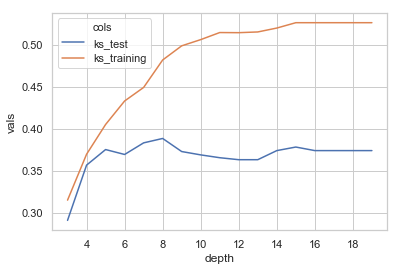

In [85]:
lst_depth = []
lst_dtc = []

lst_tst_ks = []
lst_trn_ks = []

lst_tst_gini = []
lst_trn_gini = []

for ii in range(3,20):
    lst_depth.append(ii)
    dtc = tree.DecisionTreeClassifier(max_depth = ii
                                      ,min_samples_leaf = 100
                                      ,min_samples_split = 200
                                      ,random_state = 2019)
    lst_dtc.append(dtc)
    dtc.fit(X_trn, y_trn)
    
    y_pred_prob_tst = dtc.predict_proba(X_tst)
    np_tst = np.stack((y_pred_prob_tst[:,1], y_tst.to_numpy()), axis=1)
    ks_tst_ii, gini_tst_ii = ks_gini(np_tst, 100, 'test')
    lst_tst_ks.append(ks_tst_ii)
    lst_tst_gini.append(gini_tst_ii)
    #print('test ks/gini: {0:2.2%}/{1:.4f}'.format(ks_tst,gini_tst))
    
    y_pred_prob_trn = dtc.predict_proba(X_trn)
    np_trn = np.stack((y_pred_prob_trn[:,1], y_trn.to_numpy()), axis=1)
    ks_trn_ii, gini_trn_ii = ks_gini(np_trn, 100, 'test')
    #print('training ks/gini: {0:2.2%}/{1:.4f}'.format(ks_trn,gini_trn))
    lst_trn_ks.append(ks_trn_ii)
    lst_trn_gini.append(gini_trn_ii)

    
df_ks = pd.DataFrame(list(zip(lst_depth, lst_tst_ks, lst_trn_ks)),
                     columns=['depth','ks_test', 'ks_training'])

df_ks1 = df_ks.melt('depth', var_name='cols',  value_name='vals')
sns.lineplot(x="depth", y="vals", hue='cols', data=df_ks1)

In [87]:
df_ks['diff_trn_tst'] = df_ks['ks_training'] - df_ks['ks_test']
df_ks

,depth,ks_test,ks_training,diff_trn_tst
0,3,0.290833,0.314901,0.024068
1,4,0.356572,0.369537,0.012965
2,5,0.375123,0.404959,0.029836
3,6,0.369271,0.432915,0.063644
4,7,0.383089,0.449056,0.065967
5,8,0.388320,0.481723,0.093403
6,9,0.372756,0.498569,0.125813
7,10,0.368773,0.505968,0.137194
8,11,0.365411,0.514391,0.148979
9,12,0.363045,0.514231,0.151186


In [88]:
lst_dtc[2]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2019,
            splitter='best')

In [89]:
dot_data = tree.export_graphviz(lst_dtc[2], out_file='fixed_obj_tree.dot', feature_names=X.columns, class_names=['Not Fatal','Fatal'],
                                filled=True, rounded=True, special_characters=True)

In [90]:
!dot -Tpng fixed_obj_tree.dot -o fixed_obj_tree.png

In [91]:
dot_data = tree.export_graphviz(lst_dtc[2], out_file='fixed_obj_tree1.dot', feature_names=X.columns, class_names=['Not Fatal','Fatal'],
                                filled=True, rounded=True, proportion=True, special_characters=True)

In [92]:
!dot -Tpng fixed_obj_tree1.dot -o fixed_obj_tree1.png

## 3.3 crash others

In [161]:

pd.crosstab(df_crash_others['ind_fatal'],df_crash_others['MCYCLE_DEATH_COUNT'])

#PED_DEATH_COUNT
#BICYCLE_DEATH_COUNT
#MCYCLE_DEATH_COUNT

MCYCLE_DEATH_COUNT,0,1,2
ind_fatal,,,
0,87722,0,0
1,269,124,1


In [100]:
# try ind_fatal first
#X = df_crash_others[features_all]
X = df_crash_others[features_v1]
#y = df_crash_others['ind_fatal']
y = df_crash_others['ind_fatal_maj_inj']

X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, random_state=2018)

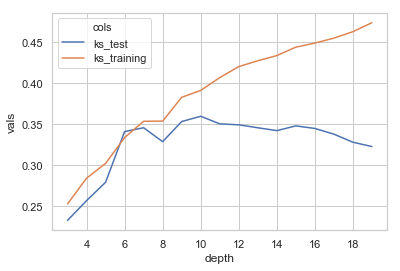

In [101]:
lst_depth = []
lst_dtc = []

lst_tst_ks = []
lst_trn_ks = []

lst_tst_gini = []
lst_trn_gini = []

for ii in range(3,20):
    lst_depth.append(ii)
    dtc = tree.DecisionTreeClassifier(max_depth = ii
                                      ,min_samples_leaf = 200
                                      ,min_samples_split = 300
                                      ,random_state = 2019)
    lst_dtc.append(dtc)
    dtc.fit(X_trn, y_trn)
    
    y_pred_prob_tst = dtc.predict_proba(X_tst)
    np_tst = np.stack((y_pred_prob_tst[:,1], y_tst.to_numpy()), axis=1)
    ks_tst_ii, gini_tst_ii = ks_gini(np_tst, 100, 'test')
    lst_tst_ks.append(ks_tst_ii)
    lst_tst_gini.append(gini_tst_ii)
    #print('test ks/gini: {0:2.2%}/{1:.4f}'.format(ks_tst,gini_tst))
    
    y_pred_prob_trn = dtc.predict_proba(X_trn)
    np_trn = np.stack((y_pred_prob_trn[:,1], y_trn.to_numpy()), axis=1)
    ks_trn_ii, gini_trn_ii = ks_gini(np_trn, 100, 'test')
    #print('training ks/gini: {0:2.2%}/{1:.4f}'.format(ks_trn,gini_trn))
    lst_trn_ks.append(ks_trn_ii)
    lst_trn_gini.append(gini_trn_ii)

    
df_ks = pd.DataFrame(list(zip(lst_depth, lst_tst_ks, lst_trn_ks)),
                     columns=['depth','ks_test', 'ks_training'])

df_ks1 = df_ks.melt('depth', var_name='cols',  value_name='vals')
sns.lineplot(x="depth", y="vals", hue='cols', data=df_ks1)

In [102]:
df_ks['diff_trn_tst'] = df_ks['ks_training'] - df_ks['ks_test']
df_ks

,depth,ks_test,ks_training,diff_trn_tst
0,3,0.232688,0.252728,0.020039
1,4,0.256766,0.284204,0.027438
2,5,0.279207,0.302241,0.023034
3,6,0.341139,0.333778,-0.007360
4,7,0.345767,0.353692,0.007926
5,8,0.328788,0.353896,0.025108
6,9,0.353372,0.382957,0.029585
7,10,0.359800,0.391382,0.031581
8,11,0.350559,0.406980,0.056421
9,12,0.349382,0.420443,0.071061


In [103]:
lst_dtc[2]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=200, min_samples_split=300,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2019,
            splitter='best')

In [104]:
dot_data = tree.export_graphviz(lst_dtc[3], out_file='crash_others_tree.dot', feature_names=X.columns, class_names=['Not Fatal','Fatal'],
                                filled=True, rounded=True, special_characters=True)

!dot -Tpng crash_others_tree.dot -o crash_others_tree.png

In [105]:
dot_data = tree.export_graphviz(lst_dtc[3], out_file='crash_others_tree1.dot', feature_names=X.columns, class_names=['Not Fatal','Fatal'],
                                filled=True, rounded=True, proportion=True, special_characters=True)

!dot -Tpng crash_others_tree1.dot -o crash_others_tree1.png